This notebook processes the data from a run of 7 cans in the ETC mini-fridge.

I demonstrate the use of resampling and interpolating to get the two data series from different locations in the refrigerator on the same scale.

Plotting the difference in these should show the emergence of a temperature gradient over time.

$$ \sum = \frac{n_i}{x_i} $$

In [1]:
import pandas as pd
%matplotlib inline

In [ ]:
# how do I slice this data and put it in the same data frame?
# probably want to use the 1970 time stamp

In [3]:
data_1 = pd.read_csv('../raw-data/SSU-01_2015-12-03.csv', parse_dates=True, index_col=0)
data_2 = pd.read_csv('../raw-data/SSU-02_2015-12-03.csv', parse_dates=True, index_col=0)
data_1.head()

,Time.1,Temperature (C),Light (Lux),Humidity (%RH)
Time,,,,
2015-12-02 13:59:13,1449093553,20.187,6.2,41.01
2015-12-02 14:09:13,1449094153,16.625,4.7,40.15
2015-12-02 14:19:13,1449094753,14.750,3.9,39.69
2015-12-02 14:29:13,1449095353,13.312,3.3,39.34
2015-12-02 14:39:13,1449095953,12.250,3.1,39.09


In [4]:
data_2.head()

,Time.1,Temperature (C),Light (Lux),Humidity (%RH)
Time,,,,
2015-12-02 13:57:45,1449093465,19.562,3.5,41.24
2015-12-02 14:07:45,1449094065,14.062,2.1,39.42
2015-12-02 14:17:45,1449094665,11.437,1.9,38.81
2015-12-02 14:27:45,1449095265,10.125,1.5,38.51
2015-12-02 14:37:45,1449095865,9.250,1.4,38.31


Janky merging of data into one data frame with even samples.

In [5]:
data_resampled = data_1.resample('1S')
data_int = data_resampled.interpolate()
data_final = data_int.resample('1min')
data_final['temp1'] = data_final['Temperature (C)']

In [6]:
data_resampled = data_2.resample('1S')
data_int = data_resampled.interpolate()
data_final['temp2'] = data_int.resample('1min')['Temperature (C)']
#data_final['temp1'] = data_final['Temperature (C)']
data_final.head()

,Time.1,Temperature (C),Light (Lux),Humidity (%RH),temp1,temp2
Time,,,,,,
2015-12-02 13:59:00,1.449094e+09,20.050457,6.14250,40.977033,20.050457,18.604083
2015-12-02 14:00:00,1.449094e+09,19.732845,6.00875,40.900350,19.732845,18.054083
2015-12-02 14:01:00,1.449094e+09,19.376645,5.85875,40.814350,19.376645,17.504083
2015-12-02 14:02:00,1.449094e+09,19.020445,5.70875,40.728350,19.020445,16.954083
2015-12-02 14:03:00,1.449094e+09,18.664245,5.55875,40.642350,18.664245,16.404083


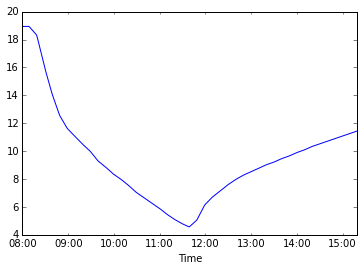

In [7]:
# next merge temp for 1 and temp for 2
# maybe write something to do this for multiple files?

data_final['2015-12-03 08:00':'2015-12-03 17:00']['Temperature (C)'].plot()

In [8]:
data_final.head()

,Time.1,Temperature (C),Light (Lux),Humidity (%RH),temp1,temp2
Time,,,,,,
2015-12-02 13:59:00,1.449094e+09,20.050457,6.14250,40.977033,20.050457,18.604083
2015-12-02 14:00:00,1.449094e+09,19.732845,6.00875,40.900350,19.732845,18.054083
2015-12-02 14:01:00,1.449094e+09,19.376645,5.85875,40.814350,19.376645,17.504083
2015-12-02 14:02:00,1.449094e+09,19.020445,5.70875,40.728350,19.020445,16.954083
2015-12-02 14:03:00,1.449094e+09,18.664245,5.55875,40.642350,18.664245,16.404083


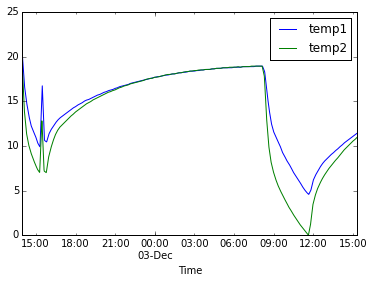

In [9]:
data_final[['temp1', 'temp2']].plot()

We see what looks like a steady temperature difference emerging across the refrigerator between 9 and 12 as the drinks cooled.

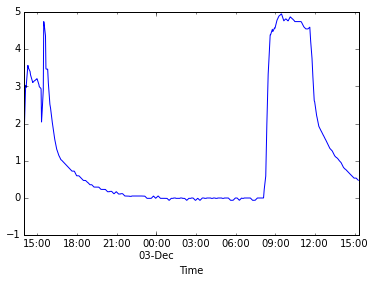

In [10]:
(data_final['temp1']-data_final['temp2']).plot()

In [11]:
from pint import UnitRegistry
u = UnitRegistry()

In [12]:
delta_T = (18 - 2.5) * u.delta_degC
mass_liquid = 17 * 355 * u.gram
heat_capacity = 4.2 * u.joule / u.gram / u.delta_degC

In [13]:
energy_extracted = mass_liquid * delta_T * heat_capacity
energy_extracted

<Quantity(392878.5, 'joule')>

In [14]:
#3:26 hours 0.22 kwh. off at 11:50
 
time = 3 * u.hour + 26 * u.minute
time.to(u.second)

<Quantity(12360.0, 'second')>

In [15]:
electrical_energy = 0.22 * u.kWh

In [16]:
u.define('dollars=[]')
price_electricity = 0.13 * u.dollars / u.kWh

In [17]:
electrical_energy * price_electricity

<Quantity(0.0286, 'dollars')>